<a href="https://colab.research.google.com/github/mmorra13/Intro-To-ML/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [293]:
#Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [331]:
# Importing .csv data
file_path = '/content/drive/My Drive/Courses/Intro-to-ML/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head() #Show first 5 of .csv data to confirm import success

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [332]:
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

#Defining map function
def binary_map(x):
  return x.map({'yes': 1, 'no': 0})

#Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [333]:
from sklearn.model_selection import train_test_split

#We specificy this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6419000,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,5950000,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3010000,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished


In [334]:
#PROBLEM 1a

#Define parameters needed for gradient descent
iterations = 200 #Arbitrary, explore other values for best results
alpha = 0.01 #Use 0.1 and 0.01, see which is best
theta1a = np.zeros(6) #Initialzing thetas to 1, 6 needed for 5 input variables

n = len(df_train)
m = len(df_test)

x_0 = np.ones((n,1)) #Ones column to stack for theta 0
x_0b = np.ones((m,1))

In [335]:
xtrainstart = df_train.values[:,1:5].astype(float) #Most of desired inputs
xtrainmore = df_train.values[:,10].astype(float) #Last desired input
xtrainmorereshape = xtrainmore.reshape(n,1) #Reshape the second array to be combined
xtrain1a = np.hstack((x_0,xtrainstart,xtrainmorereshape)) #All input variables desired  for training set
ytrain1a = df_train.values[:,0].astype(float) #Output for training set

xteststart = df_test.values[:,1:5].astype(float) #Most of desired inputs
xtestmore = df_test.values[:,10].astype(float) #Last desired input
xtestmorereshape = xtestmore.reshape(m,1) #Reshape the second array to be combined
xtest1a = np.hstack((x_0b,xteststart,xtestmorereshape)) #All input variables desired for test set
ytest1a = df_test.values[:,0].astype(float) #Output for test set

<ipython-input-336-c88a0f5e396a>:8: RuntimeWarning: overflow encountered in square
  train_loss_1a = (1/n) * np.sum(np.square(xtrain1a.dot(theta1a) - ytrain1a))
<ipython-input-336-c88a0f5e396a>:9: RuntimeWarning: overflow encountered in square
  val_loss_1a = (1/m) * np.sum(np.square(xtest1a.dot(theta1a) - ytest1a))
<ipython-input-336-c88a0f5e396a>:6: RuntimeWarning: invalid value encountered in subtract
  theta1a -= alpha * gradients


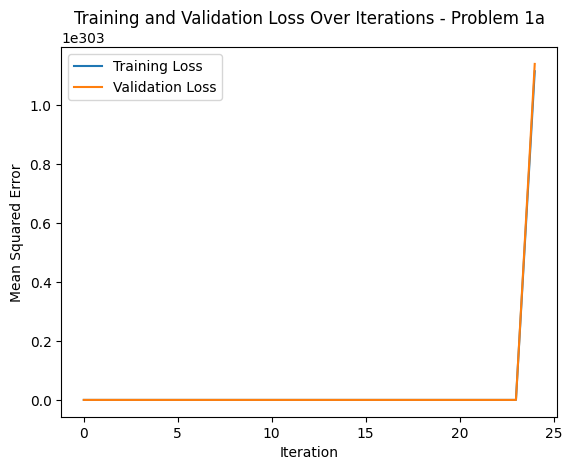

In [336]:
train_losses_1a = []
val_losses_1a = []

for iteration in range(iterations):
    gradients = 2/n * xtrain1a.T.dot(xtrain1a.dot(theta1a) - ytrain1a)
    theta1a -= alpha * gradients

    train_loss_1a = (1/n) * np.sum(np.square(xtrain1a.dot(theta1a) - ytrain1a))
    val_loss_1a = (1/m) * np.sum(np.square(xtest1a.dot(theta1a) - ytest1a))

    train_losses_1a.append(train_loss_1a)
    val_losses_1a.append(val_loss_1a)
#Plot the training and validation loss after each iteration
plt.plot(train_losses_1a, label="Training Loss")
plt.plot(val_losses_1a, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations - Problem 1a")
plt.show()

In [337]:
#PROBLEM 1b
xtrain1b = df_train.values[:,1:12].astype(float) #All input variables required training set
xtrain1b = np.hstack((x_0,xtrain1b)) #Add 1's column, Input data is ready for training
ytrain1b = df_train.values[:,0].astype(float) #Output for training set
theta1b = np.zeros(12) #12 thetas needed for 11 input variables

xtest1b = df_test.values[:,1:12].astype(float) #All input variables required for test set
xtest1b = np.hstack((x_0b,xtest1b)) #Add 1's column, Input data is ready for validation
ytest1b = df_test.values[:,0].astype(float) #Output for test set


<ipython-input-338-1c43d2504880>:8: RuntimeWarning: overflow encountered in square
  train_loss_1b = (1/n) * np.sum(np.square(xtrain1b.dot(theta1b) - ytrain1b))
<ipython-input-338-1c43d2504880>:9: RuntimeWarning: overflow encountered in square
  val_loss_1b = (1/m) * np.sum(np.square(xtest1b.dot(theta1b) - ytest1b))
<ipython-input-338-1c43d2504880>:6: RuntimeWarning: invalid value encountered in subtract
  theta1b -= alpha * gradients


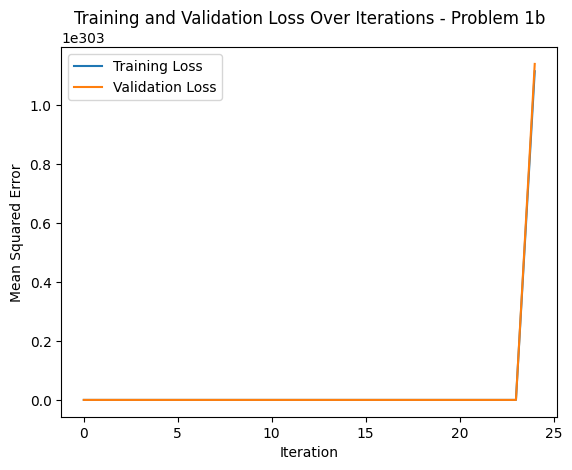

In [338]:
train_losses_1b = []
val_losses_1b = []

for iteration in range(iterations):
    gradients = 2/n * xtrain1b.T.dot(xtrain1b.dot(theta1b) - ytrain1b)
    theta1b -= alpha * gradients

    train_loss_1b = (1/n) * np.sum(np.square(xtrain1b.dot(theta1b) - ytrain1b))
    val_loss_1b = (1/m) * np.sum(np.square(xtest1b.dot(theta1b) - ytest1b))

    train_losses_1b.append(train_loss_1b)
    val_losses_1b.append(val_loss_1b)

#Plot the training and validation loss after each iteration
plt.plot(train_losses_1b, label="Training Loss")
plt.plot(val_losses_1b, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations - Problem 1b")
plt.show()

In [339]:
#PROBLEM 2a
#Input normalization
from sklearn.preprocessing import MinMaxScaler
normscaler = MinMaxScaler()

#Apply normscaler() to all columns except 'yes-no' and 'dummy' variables
#'price' was included to scale the output
#This is NOT REQUIRED, but I did it to increase the readability of the final loss
num_vars = ['price','area', 'bedrooms','bathrooms','stories','parking',] #Price included, output does NOT need to be normalized, however doing so increases readability of loss

df_train2norm = df_train #Copy of training set
df_train2norm[num_vars] = normscaler.fit_transform(df_train2norm[num_vars]) #Apply normalization
df_test2norm = df_test #Copy of test set
df_test2norm[num_vars] = normscaler.fit_transform(df_test2norm[num_vars]) #Apply normalization



In [340]:
xtrainstart2anorm = df_train2norm.values[:,1:5].astype(float) #Most of desired inputs
xtrainmore2anorm = df_train2norm.values[:,10].astype(float) #Last desired input
xtrainmorereshape2anorm = xtrainmore2anorm.reshape(n,1) #Reshape second array to be combined
xtrain2anorm = np.hstack((x_0,xtrainstart2anorm,xtrainmorereshape2anorm)) #Input variables for training set
ytrain2anorm = df_train2norm.values[:,0].astype(float) #Output for training set

xteststart2anorm = df_test2norm.values[:,1:5].astype(float) #Most of desired inputs
xtestmore2anorm = df_test2norm.values[:,10].astype(float) #Last desired input
xtestmorereshape2anorm = xtestmore2anorm.reshape(m,1) #Reshape the second array to be combined
xtest2anorm = np.hstack((x_0b,xteststart2anorm,xtestmorereshape2anorm)) #All input variables desired for test set
ytest2anorm = df_test2norm.values[:,0].astype(float) #Output for test set

theta2anorm = np.zeros(6) #Initialize theta to 0

Final value of theta = [0.16770996 0.07929493 0.08420476 0.06076299 0.09224283 0.08003765]
Final training cost = 0.01745923394163811
Final validation cost = 0.01976647565924746


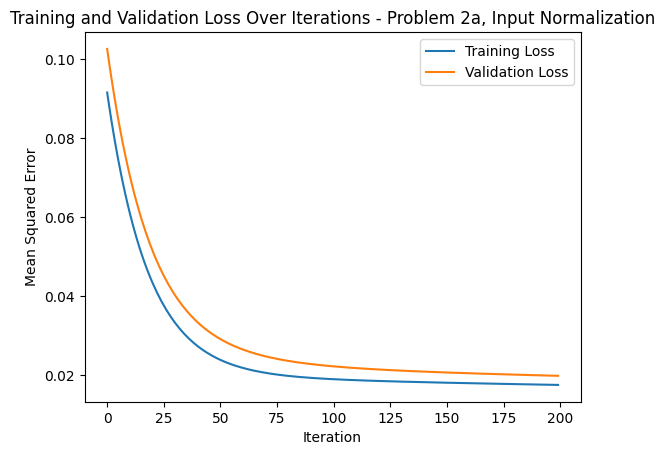

In [341]:
train_losses_2anorm = []
val_losses_2anorm = []

for iteration in range(iterations):
    gradients = 2/n * xtrain2anorm.T.dot(xtrain2anorm.dot(theta2anorm) - ytrain2anorm)
    theta2anorm -= alpha * gradients

    train_loss_2anorm = (1/n) * np.sum(np.square(xtrain2anorm.dot(theta2anorm) - ytrain2anorm))
    val_loss_2anorm = (1/m) * np.sum(np.square(xtest2anorm.dot(theta2anorm) - ytest2anorm))

    train_losses_2anorm.append(train_loss_2anorm)
    val_losses_2anorm.append(val_loss_2anorm)
print('Final value of theta =', theta2anorm)
print('Final training cost =', train_losses_2anorm[iterations-1])
print('Final validation cost =', val_losses_2anorm[iterations-1] )
#Plot the training and validation loss after each iteration
plt.plot(train_losses_2anorm, label="Training Loss")
plt.plot(val_losses_2anorm, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations - Problem 2a, Input Normalization")
plt.show()

In [342]:
#Input Standardization
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

#Apply standardscaler() to all columns except 'yes-no' and 'dummy' variables
df_train2standard = df_train #Copy of training set
df_train2standard[num_vars] = standardscaler.fit_transform(df_train2standard[num_vars]) #Apply standardization
df_test2standard = df_test #Copy of test set
df_test2standard[num_vars] = standardscaler.fit_transform(df_test2standard[num_vars]) #Apply standardization

In [343]:
xtrainstart2astandard = df_train2standard.values[:,1:5].astype(float) #Most of desired inputs
xtrainmore2astandard = df_train2standard.values[:,10].astype(float) #Last desired input
xtrainmorereshape2astandard = xtrainmore2astandard.reshape(n,1) #Reshape second array to be combined
xtrain2astandard = np.hstack((x_0,xtrainstart2astandard,xtrainmorereshape2astandard)) #Input variables for training set
ytrain2astandard = df_train2standard.values[:,0].astype(float) #Output for training set

xteststart2astandard = df_test2standard.values[:,1:5].astype(float) #Most of desired inputs
xtestmore2astandard = df_test2standard.values[:,10].astype(float) #Last desired input
xtestmorereshape2astandard = xtestmore2astandard.reshape(m,1) #Reshape the second array to be combined
xtest2astandard = np.hstack((x_0b,xteststart2astandard,xtestmorereshape2astandard)) #All input variables desired for test set
ytest2astandard = df_test2standard.values[:,0].astype(float) #Output for test set

theta2astandard = np.zeros(6) #Initialize theta to 0

Final value of theta = [1.80650602e-16 3.83443556e-01 5.96337037e-02 3.35809102e-01
 2.40082233e-01 1.59167253e-01]
Final training cost = 0.43787223165607575
Final validation cost = 0.44592605620660675


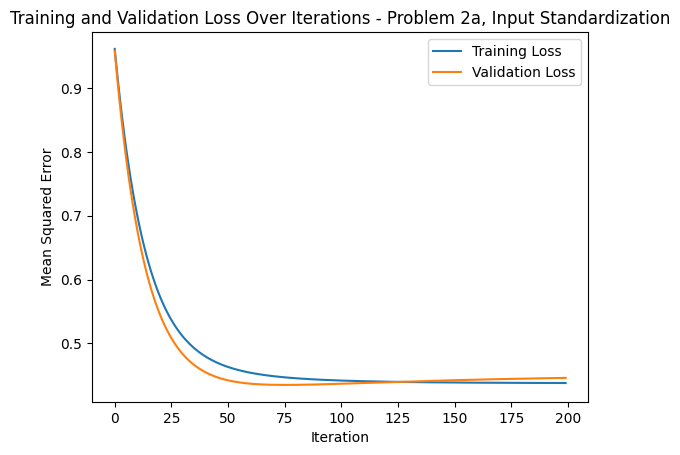

In [344]:
train_losses_2astandard = []
val_losses_2astandard = []

for iteration in range(iterations):
    gradients = 2/n * xtrain2astandard.T.dot(xtrain2astandard.dot(theta2astandard) - ytrain2astandard)
    theta2astandard -= alpha * gradients

    train_loss_2astandard = (1/n) * np.sum(np.square(xtrain2astandard.dot(theta2astandard) - ytrain2astandard))
    val_loss_2astandard = (1/m) * np.sum(np.square(xtest2astandard.dot(theta2astandard) - ytest2astandard))

    train_losses_2astandard.append(train_loss_2astandard)
    val_losses_2astandard.append(val_loss_2astandard)
print('Final value of theta =', theta2astandard)
print('Final training cost =', train_losses_2astandard[iterations-1])
print('Final validation cost =', val_losses_2astandard[iterations-1] )
#Plot the training and validation loss after each iteration
plt.plot(train_losses_2astandard, label="Training Loss")
plt.plot(val_losses_2astandard, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations - Problem 2a, Input Standardization")
plt.show()

In [345]:
#PROBLEM 2b
#Input Normalization
xtrain2bnorm = df_train2norm.values[:,1:12].astype(float) #All input variables required training set
xtrain2bnorm = np.hstack((x_0,xtrain2bnorm)) #Add 1's column, Input data is ready for training
ytrain2bnorm = df_train2norm.values[:,0].astype(float) #Output for training set
theta2bnorm = np.zeros(12) #12 thetas needed for 11 input variables

xtest2bnorm = df_test2norm.values[:,1:12].astype(float) #All input variables required for test set
xtest2bnorm = np.hstack((x_0b,xtest2bnorm)) #Add 1's column, Input data is ready for validation
ytest2bnorm = df_test2norm.values[:,0].astype(float) #Output for test set

Final value of theta = [-0.17634619  0.34488595  0.05105282  0.31727005  0.22665447  0.0337725
  0.12720874  0.11913035  0.06160149  0.2343741   0.14935034  0.18136497]
Final training cost = 0.3648844435418761
Final validation cost = 0.3463686788923458


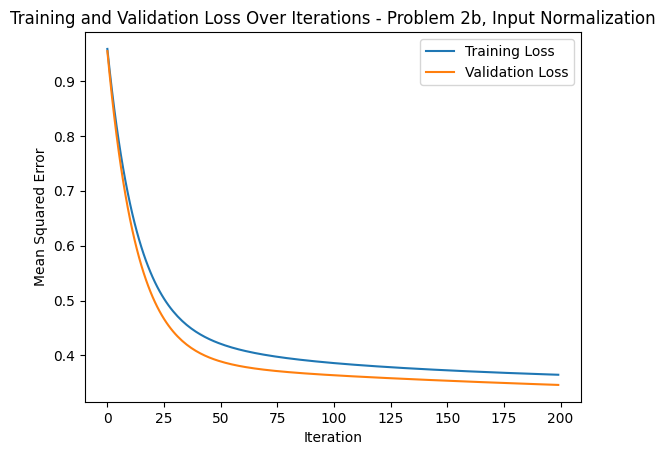

In [346]:
train_losses_2bnorm = []
val_losses_2bnorm = []

for iteration in range(iterations):
    gradients = 2/n * xtrain2bnorm.T.dot(xtrain2bnorm.dot(theta2bnorm) - ytrain2bnorm)
    theta2bnorm -= alpha * gradients

    train_loss_2bnorm = (1/n) * np.sum(np.square(xtrain2bnorm.dot(theta2bnorm) - ytrain2bnorm))
    val_loss_2bnorm = (1/m) * np.sum(np.square(xtest2bnorm.dot(theta2bnorm) - ytest2bnorm))

    train_losses_2bnorm.append(train_loss_2bnorm)
    val_losses_2bnorm.append(val_loss_2bnorm)
print('Final value of theta =', theta2bnorm)
print('Final training cost =', train_losses_2bnorm[iterations-1])
print('Final validation cost =', val_losses_2bnorm[iterations-1] )
#Plot the training and validation loss after each iteration
plt.plot(train_losses_2bnorm, label="Training Loss")
plt.plot(val_losses_2bnorm, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations - Problem 2b, Input Normalization")
plt.show()

In [347]:
#Input Standardization
xtrain2bstandard = df_train2standard.values[:,1:12].astype(float) #All input variables required training set
xtrain2bstandard = np.hstack((x_0,xtrain2bstandard)) #Add 1's column, Input data is ready for training
ytrain2bstandard = df_train2standard.values[:,0].astype(float) #Output for training set
theta2bstandard = np.zeros(12) #12 thetas needed for 11 input variables

xtest2bstandard = df_test2standard.values[:,1:12].astype(float) #All input variables required for test set
xtest2bstandard = np.hstack((x_0b,xtest2bstandard)) #Add 1's column, Input data is ready for validation
ytest2bstandard = df_test2standard.values[:,0].astype(float) #Output for test set

Final value of theta = [-0.17634619  0.34488595  0.05105282  0.31727005  0.22665447  0.0337725
  0.12720874  0.11913035  0.06160149  0.2343741   0.14935034  0.18136497]
Final training cost = 0.3648844435418761
Final validation cost = 0.3463686788923458


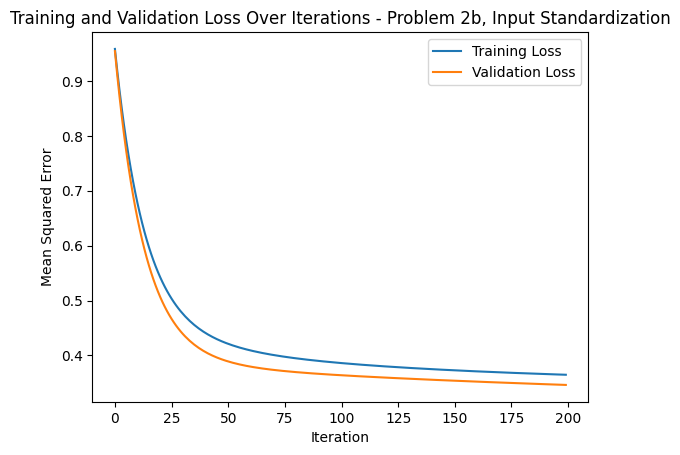

In [348]:
train_losses_2bstandard = []
val_losses_2bstandard = []

for iteration in range(iterations):
    gradients = 2/n * xtrain2bstandard.T.dot(xtrain2bstandard.dot(theta2bstandard) - ytrain2bstandard)
    theta2bstandard-= alpha * gradients

    train_loss_2bstandard = (1/n) * np.sum(np.square(xtrain2bstandard.dot(theta2bstandard) - ytrain2bstandard))
    val_loss_2bstandard = (1/m) * np.sum(np.square(xtest2bstandard.dot(theta2bstandard) - ytest2bstandard))

    train_losses_2bstandard.append(train_loss_2bstandard)
    val_losses_2bstandard.append(val_loss_2bstandard)
print('Final value of theta =', theta2bstandard)
print('Final training cost =', train_losses_2bstandard[iterations-1])
print('Final validation cost =', val_losses_2bstandard[iterations-1] )
#Plot the training and validation loss after each iteration
plt.plot(train_losses_2bstandard, label="Training Loss")
plt.plot(val_losses_2bstandard, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations - Problem 2b, Input Standardization")
plt.show()

In [349]:
#PROBLEM 3a
reg_parameter = 1 #Lambda = 1, experiment with other values (0.5, 10)
#Using normalization input scaling
df_train3norm = df_train #Copy of training set
df_train3norm[num_vars] = normscaler.fit_transform(df_train3norm[num_vars]) #Apply Normalization
df_test3norm = df_test #Copy of test set
df_test3norm[num_vars] = normscaler.fit_transform(df_test3norm[num_vars]) #Apply Normalization

In [350]:
xtrainstart3anorm = df_train3norm.values[:,1:5].astype(float) #Most of desired inputs
xtrainmore3anorm = df_train3norm.values[:,10].astype(float) #Last desired input
xtrainmorereshape3anorm = xtrainmore3anorm.reshape(n,1) #Reshape second array to be combined
xtrain3anorm = np.hstack((x_0,xtrainstart3anorm,xtrainmorereshape3anorm)) #Input variables for training set
ytrain3anorm = df_train3norm.values[:,0].astype(float) #Output for training set

xteststart3anorm = df_test3norm.values[:,1:5].astype(float) #Most of desired inputs
xtestmore3anorm = df_test3norm.values[:,10].astype(float) #Last desired input
xtestmorereshape3anorm = xtestmore3anorm.reshape(m,1) #Reshape the second array to be combined
xtest3anorm = np.hstack((x_0b,xteststart3anorm,xtestmorereshape3anorm)) #All input variables desired for test set
ytest3anorm = df_test3norm.values[:,0].astype(float) #Output for test set

theta3anorm = np.zeros(6) #Initialize theta to 0

Final value of theta = [0.16770996 0.07929493 0.08420476 0.06076299 0.09224283 0.08003765]
Final training cost = 0.01753259410850236
Final validation cost = 0.019766475659247454


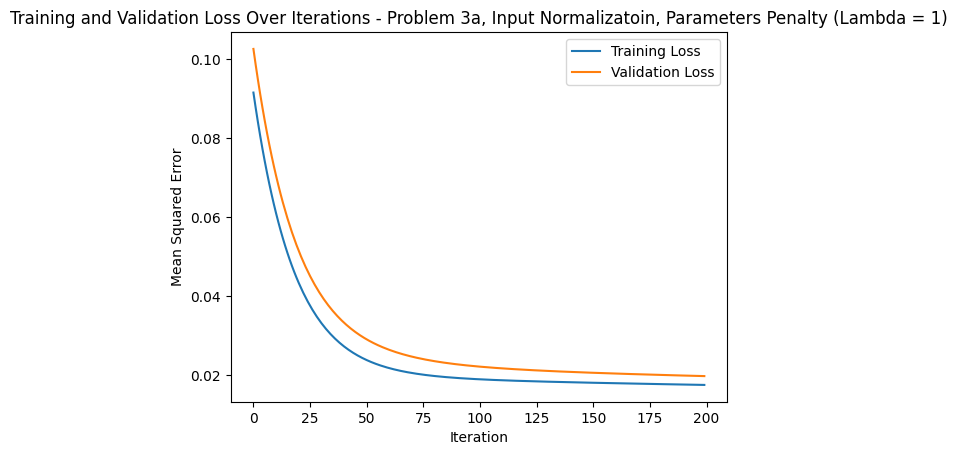

In [351]:
train_losses_3anorm = []
val_losses_3anorm = []

for iteration in range(iterations):
    gradients = 2/n * xtrain3anorm.T.dot(xtrain3anorm.dot(theta3anorm) - ytrain3anorm)
    theta3anorm -= alpha * gradients

    train_loss_3anorm = (1/n) * (np.sum(np.square(xtrain3anorm.dot(theta3anorm) - ytrain3anorm)) + (reg_parameter * np.sum(np.square(theta3anorm[1:6])))) #Edited to include parameter penalties
    val_loss_3anorm = (1/m) * np.sum(np.square(xtest3anorm.dot(theta3anorm) - ytest3anorm))

    train_losses_3anorm.append(train_loss_3anorm)
    val_losses_3anorm.append(val_loss_3anorm)
print('Final value of theta =', theta3anorm)
print('Final training cost =', train_losses_3anorm[iterations-1])
print('Final validation cost =', val_losses_3anorm[iterations-1] )
#Plot the training and validation loss after each iteration
plt.plot(train_losses_3anorm, label="Training Loss")
plt.plot(val_losses_3anorm, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations - Problem 3a, Input Normalizatoin, Parameters Penalty (Lambda = 1)")
plt.show()

In [352]:
#PROBLEM 3b
xtrain3bnorm = df_train3norm.values[:,1:12].astype(float) #All input variables required training set
xtrain3bnorm = np.hstack((x_0,xtrain3bnorm)) #Add 1's column, Input data is ready for training
ytrain3bnorm = df_train3norm.values[:,0].astype(float) #Output for training set
theta3bnorm = np.zeros(12) #12 thetas needed for 11 input variables

xtest3bnorm = df_test3norm.values[:,1:12].astype(float) #All input variables required for test set
xtest3bnorm = np.hstack((x_0b,xtest3bnorm)) #Add 1's column, Input data is ready for validation
ytest3bnorm = df_test3norm.values[:,0].astype(float) #Output for test set

Final value of theta = [0.07902665 0.05022508 0.05013962 0.04977608 0.06657113 0.08083814
 0.03716493 0.03296518 0.0208354  0.07864512 0.05351951 0.04672121]
Final training cost = 0.013265381122889996
Final validation cost = 0.014456285723916043


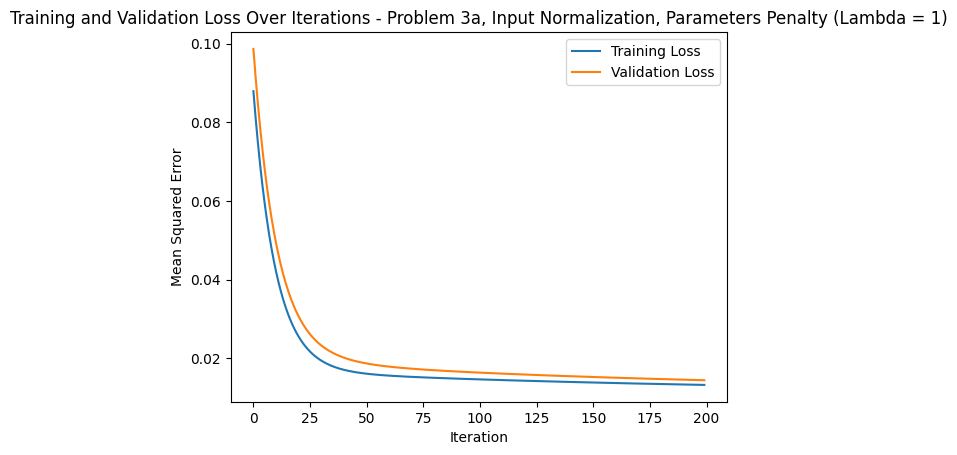

In [353]:
train_losses_3bnorm = []
val_losses_3bnorm = []

for iteration in range(iterations):
    gradients = 2/n * xtrain3bnorm.T.dot(xtrain3bnorm.dot(theta3bnorm) - ytrain3bnorm)
    theta3bnorm -= alpha * gradients

    train_loss_3bnorm = (1/n) * (np.sum(np.square(xtrain3bnorm.dot(theta3bnorm) - ytrain3bnorm)) + (reg_parameter * np.sum(np.square(theta3bnorm[1:12])))) #Edited to include parameter penalties
    val_loss_3bnorm = (1/m) * np.sum(np.square(xtest3bnorm.dot(theta3bnorm) - ytest3bnorm))

    train_losses_3bnorm.append(train_loss_3bnorm)
    val_losses_3bnorm.append(val_loss_3bnorm)
print('Final value of theta =', theta3bnorm)
print('Final training cost =', train_losses_3bnorm[iterations-1])
print('Final validation cost =', val_losses_3bnorm[iterations-1] )
#Plot the training and validation loss after each iteration
plt.plot(train_losses_3bnorm, label="Training Loss")
plt.plot(val_losses_3bnorm, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations - Problem 3a, Input Normalization, Parameters Penalty (Lambda = 1)")
plt.show()